# In-class exercises Class 23

---

Today we will continue to learn how to use some Machine Learning tools. 


At first, I know that the Pandas DataFrame seemed like an extra layer that wasn't necessary, but it was designed to make working with Machine Learning easier.  So, as we do some of that you will see the value.  Let's do it!  

Last time we used a simple Support Vector Machine on 'blobs'.  Today, we will discuss a simple Bayes classifier.  In class, we discussed how the Bayes classifier uses 'prior' knowledge to define the classifier.  The simple example we use today assumes, as the prior, that all distributions come from Gaussian distributions.  This certainly isn't always the case, but it isn't a bonkers hypothesis either - remember the Central Limit Theorem?  


As a reference, if you need it, you can find the documentation of the class for GaussianNB here:

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

Let's start by importing what we need and import the Iris dataset.  


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#We will start using a few sklearn tools
from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB


iris_df = pd.read_csv('data/iris.data')


#Let's print a few rows to make sure it worked.  
iris_df.sample(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
137,6.4,3.1,5.5,1.8,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
3,4.6,3.1,1.5,0.2,Iris-setosa
107,7.3,2.9,6.3,1.8,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica


OK, that worked, but we can still start with some blobs in order to focus on the classifier, before we focus on the specific Iris problem... 



Let's make two blobs...  


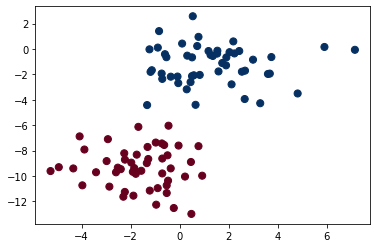

In [3]:
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');







Success - that looks like blobs to me!  We can 'fit' this with the model:

In [4]:
model = GaussianNB()
model.fit(X, y);







Now we can generate some new data and predict the label.  Let's just generate random points ("flat" data) over the full x-y plain and see how the classifier classifies them.  This might help us understand what the classifier is doing... 


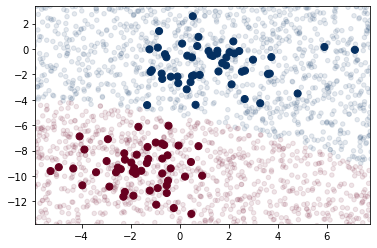

In [5]:
#Xnew, ynew_true = make_blobs(100, 2, centers=2, random_state=2, cluster_std=4)


rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
#new = model.predict(Xnew)
ynew_predict = model.predict(Xnew)

#Plot the predicted values and the training data on the same plot
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew_predict, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);


Notice that this is not perfectly linear this time.  Close, but not exactly.  So, this is doing something different than the linear SVM.


Let's try with a triple blob!


[2 1 1 1 2 1 1 2 1 0 1 2 2 2 0 1 2 2 1 1 0 0 1 0 1 2 2 0 1 2 0 0 2 1 2 2 0
 0 0 2 2 2 0 0 1 1 0 1 2 1 0 2 1 2 1 2 1 2 0 0 0 1 0 0 1 0 2 1 0 1 1 2 0 1
 0 0 1 0 2 1 0 0 0 0 2 0 1 2 0 2 0 2 2 1 2 1 1 0 2 2]


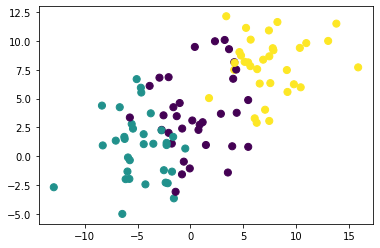

In [6]:
X2, y2 = make_blobs(100, 2, centers=3, random_state=3, cluster_std=3)
print(y2)
plt.scatter(X2[:, 0], X2[:, 1], c=y2, s=50);

Now, we have three types and the slightly overlap with each other!  Let's see what happens if we train our tool.  Let's look at "flat" data again.

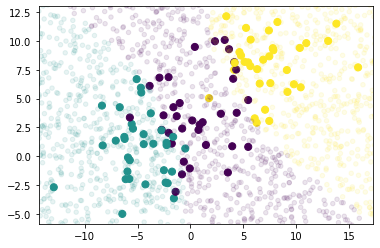

In [7]:
model = GaussianNB()
model.fit(X2, y2);


rng = np.random.RandomState(0)
X2new = [-15, -6] + [40, 20] * rng.rand(2000, 2)
#new = model.predict(Xnew)
y2new_predict = model.predict(X2new)

#print(X2new)
#print(y2new_predict)

#Plot the predicted values and the training data on the same plot
plt.scatter(X2[:, 0], X2[:, 1], c=y2, s=50)

lim = plt.axis()
plt.scatter(X2new[:, 0], X2new[:, 1], c=y2new_predict, s=20, alpha=0.1)
plt.axis(lim);

So, our algorithm made some choices.  It clearly isn't always right, because that isn't possible with this overlapping dataset and only 2-D.


## **EXERCISE 1**:  
<span style="color:red">  Do the same exercise, but with 4 blobs...       </red>
    

 
    
    
   

In [40]:
#Put your answer here.

What about blobs in 3D?  Let's try it...  

In [41]:
X3, y3 = make_blobs(100, 3, centers=3, random_state=3, cluster_std=3)

#print(X3)
#print(y3)

Here, we need to pick the two variables that we want to compare if we want to visualize it in a 2d scatter plot.  We can look at 3 different views...  



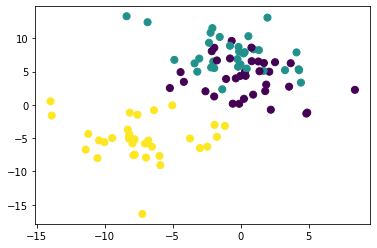

In [42]:
plt.scatter(X3[:, 0], X3[:, 1], c=y3, s=50);

There is a lot of overlap in this view.  How about the other 2?

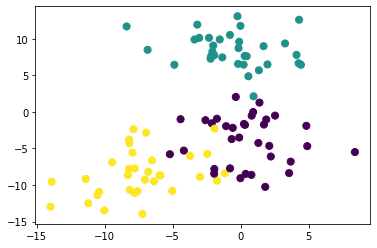

In [43]:
plt.scatter(X3[:, 0], X3[:, 2], c=y3, s=50);

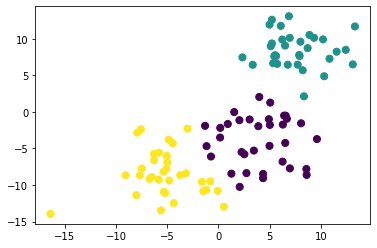

In [44]:
plt.scatter(X3[:, 1], X3[:, 2], c=y3, s=50);

Let's make a pandas DataFrame, so that I can show you an awesome trick!

In [45]:
df_3d_blob=pd.DataFrame({"x1":X3[:,0],"x2":X3[:,1],"x3":X3[:,2],"y":y3})
df_3d_blob.sample(5)

,x1,x2,x3,y
88,3.672054,6.266583,-6.798468,0
0,-1.941797,8.589775,-7.806118,0
66,3.253427,5.224594,9.379187,1
92,3.553818,2.739297,-8.369202,0
71,-5.210158,2.535141,-5.786945,0


OK, so we have a data Frame.  There is a nice class called Seaborn for making some powerful plots, and improving the format.  I like it because you can make the pairplot with a one-line command:

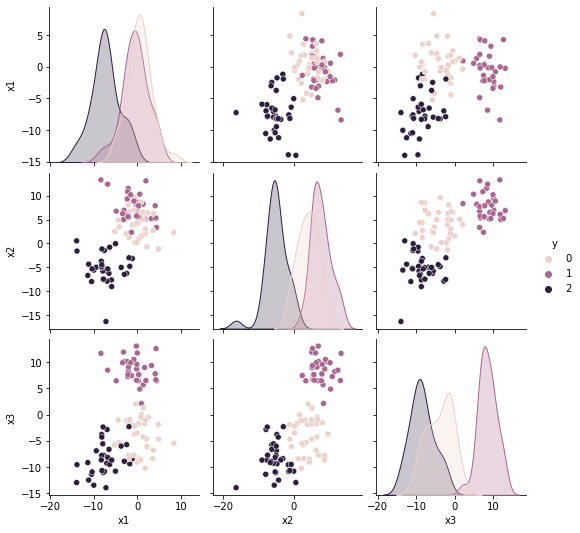

In [46]:
import seaborn as sns

sns.pairplot(df_3d_blob,hue='y')


Wow!  How much code did it take you to make that plot for Iris on you HW?  Hahaha - now you can do it in _ONE LINE OF CODE_ if you put your data in a Pandas DataFrame and use Seaborn!  I told you DataFrames were awesome!  

So, none of these variable have perfect seperation between the three classes (see diagonal of the matrix).  And, some of the 2-D distributions have more power than others.  If we combine all of this information into a single classifier, how good can we do?  Let's try it!  


First lets generate some "flat" data and try to understand how our classifier is "thinking".

[[  3.90508031  17.21514931   8.22107009]
 [  3.59065464  -6.10761605  11.67152905]
 [ -4.9930231   31.34184006  37.09302084]
 ...
 [-13.03414877  15.20401102   8.00552218]
 [ -5.34251199 -31.66137073 -28.8377559 ]
 [ 15.72182982  -1.30427084 -12.83594152]]
[1 1 1 ... 1 2 0]


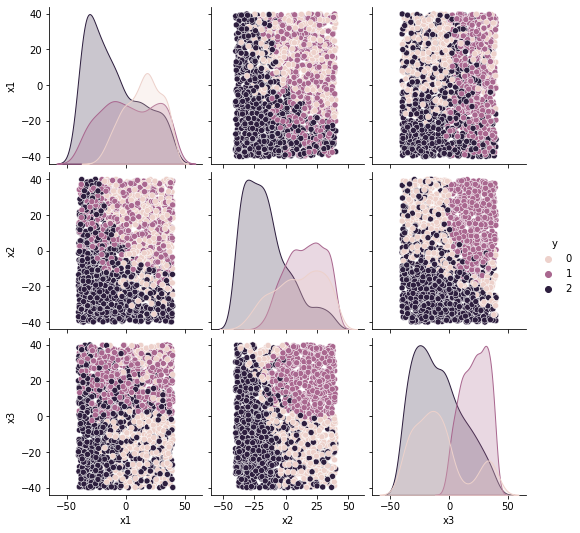

In [47]:
model = GaussianNB()
model.fit(X3, y3);


rng = np.random.RandomState(0)
X3new = [-40, -40,-40] + [80, 80,80] * rng.rand(2000, 3)
#new = model.predict(Xnew)
y3new_predict = model.predict(X3new)

print(X3new)
print(y3new_predict)


df_3d_new=pd.DataFrame({"x1":X3new[:,0],"x2":X3new[:,1],"x3":X3new[:,2],"y":y3new_predict})
df_3d_new.sample(5)

sns.pairplot(df_3d_new,hue='y')

#Plot the predicted values and the training data on the same plot
#plt.scatter(X2[:, 0], X2[:, 1], c=y2, s=50)

#lim = plt.axis()
#plt.scatter(X2new[:, 0], X2new[:, 1], c=y2new_predict, s=20, alpha=0.1)
#plt.axis(lim);

How, when we do a multivariate 'fit' we don't get simple Gaussian clustering in any of the scatter plot.  Something much more powerful is going on when it takes the correlations into account!  Its some surface in 3-D that seperates our points into classes.

Note that we generated flat data in the three directions, but our classifier "sculpted" the data to change the shape in each direction for the classified points.  

With the "flat" data we can try to understand how our algorithm is making its decisions, but, we can't understand how good it is.  For that we need to make a dataset that is clustered.  Let's do it. 

Let's redo everything, but split it into a test and training sample so that we can see how well our algorithm works.  We will train it with the test sample, and we will test it on the test sample.  

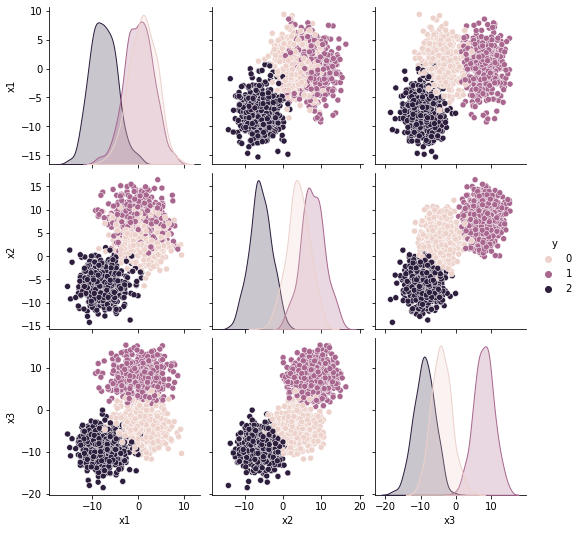

In [48]:
from sklearn.model_selection import train_test_split
#from sklearn import train_test_split

#Let's make a new dataset, but make it bigger - more samples!
X_big, y_big = make_blobs(2000, 3, centers=3, random_state=3, cluster_std=3)

#Split into the test/train samples
Xtrain, Xtest, ytrain, ytest = train_test_split(X_big, y_big,
                                                random_state=1)





df_3d_blob=pd.DataFrame({"x1":Xtrain[:,0],"x2":Xtrain[:,1],"x3":Xtrain[:,2],"y":ytrain})
df_3d_blob.sample(5)
sns.pairplot(df_3d_blob,hue='y')




OK, so the train sample looks reasonable.  Let's train the model.  

In [49]:
model = GaussianNB()
model.fit(Xtrain, ytrain);

Now, we can see how it performs on the train dataset.  

In [50]:
y_model = model.predict(Xtest)

#Let's check the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.99

Not bad!  Our model is able to predict the correct class (which blob) 99 percent of the time!

---

## Back to the Iris dataset.

Remember last time we learned how to load the Iris dataset into a Pandas DataFrame.  We loaded it above, let's make sure we still have access...



In [54]:

iris_df.sample(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
112,6.8,3.0,5.5,2.1,Iris-virginica
127,6.1,3.0,4.9,1.8,Iris-virginica
4,5.0,3.6,1.4,0.2,Iris-setosa
129,7.2,3.0,5.8,1.6,Iris-virginica
56,6.3,3.3,4.7,1.6,Iris-versicolor


## **EXERCISE 2**:  
<span style="color:red">  Make the pairplot using Seaborn for the Iris Dataset.         </red>
    

 
    
    
   

In [52]:
#Put your code here.

Let's split the Iris dataset into testing and training samples.  

In [53]:

#First we need to define the features matric (X) and the traget vector (y)

#Features Matrix
X_iris = iris_df.drop('variety', axis=1)
X_iris.shape

#Target vector
y_iris = iris_df['variety']
y_iris.shape


#Split into the test/train samples

Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)

#'fit' the model
model = GaussianNB()
model.fit(Xtrain, ytrain);

#use the model to predict the class of the test sample
y_model = model.predict(Xtest)

#Let's check the accuracy
accuracy_score(ytest, y_model)


0.9736842105263158

Even with the limited statistics of the dataset, and the simple machine learning algorithm, we got about 97% accuracy for classification of the testing sample.  Pretty awesome.  

## **EXERCISE 3**:  
<span style="color:red">  Write some code to compare the ytest and y_model predictions.  For the few samples that failed, make a plot to understand why they are difficult.  Where do these failed samples fall in the pair plot?         </red>
    

 
    
    
   

In [33]:
#Put your code here

Put your answer here.